<a href="https://colab.research.google.com/github/niteshavagabond/Hotel-Booking-analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [809]:
# importing libararies
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 
from datetime import date
import folium
import plotly.express as px
%matplotlib inline

In [810]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [811]:
# Data 
hotel_booking_df= pd.read_csv('/content/drive/MyDrive/AlmaBetter/Hotel Booking Analysis - Nitesh Verma/Hotel Bookings.csv')


# Exploring data

In [812]:
hdf=hotel_booking_df.copy()

In [813]:
hdf.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [814]:
hdf.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [815]:
hdf.shape

(119390, 32)

In [816]:
hdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [817]:
hdf.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [818]:
hdf.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

# Exploring every column of database, try to analyse and taking notes


In [819]:
hdf_columns_table=[[name,hdf[name].dtypes,hdf[name].isnull().sum(),round(hdf[name].isnull().sum()/len(hdf)*100, 2),
                   hdf[name].nunique(),hdf[name].unique()] for name in hdf.columns]
hdf_columns = pd.DataFrame(hdf_columns_table, columns = ['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique'])
hdf_columns

,Column,Dtype,Null,Null (%),nUnique,Unique
0,hotel,object,0,0.00,2,"[Resort Hotel, City Hotel]"
1,is_canceled,int64,0,0.00,2,"[0, 1]"
2,lead_time,int64,0,0.00,479,"[342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68..."
3,arrival_date_year,int64,0,0.00,3,"[2015, 2016, 2017]"
4,arrival_date_month,object,0,0.00,12,"[July, August, September, October, November, D..."
5,arrival_date_week_number,int64,0,0.00,53,"[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3..."
6,arrival_date_day_of_month,int64,0,0.00,31,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
7,stays_in_weekend_nights,int64,0,0.00,17,"[0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,..."
8,stays_in_week_nights,int64,0,0.00,35,"[0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,..."
9,adults,int64,0,0.00,14,"[2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]"


# Data cleaning process
1. Deal with columns name and give a proper name to columns.
2. Deal with duplicate rows if any
3. Drop columns, which are not required or having same values
4. Deal with null data or missing value 
5. Deal with outliers in every columns
6. Change datatype of column if needed like children is object dtype but should be in a int type.
7. merge columns (e.g. [booking_day, booking_month, booking_year], [no_of_adults, no_of_children, no_of_babies] and [stays_in_weekend_nights,  stays_in_week_nights])   

# 1.Deal with columns name and give a proper name to columns.

In [820]:
# giving proper name to columns
hdf.columns=['hotel','booking_cancel_status','lead_time','arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month',
             'stays_in_weekend_nights','stays_in_week_nights','no_of_adults','no_of_children','no_of_babies','meal_type','country','market_segment',
             'distribution_channel','repeated_guest_status','no_of_previous_cancellations','no_of_previous_booking_not_cancelled',
             'reserved_room_type','assigned_room_type','no_of_booking_changes','deposit_type','agent_id','company_id',
             'no_of_days_in_waiting_list','customer_type','adr','required_no_of_car_parking_space',
             'total_no_of_special_requests','reservation_status','reservation_status_date']

In [821]:
hdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   hotel                                 119390 non-null  object 
 1   booking_cancel_status                 119390 non-null  int64  
 2   lead_time                             119390 non-null  int64  
 3   arrival_date_year                     119390 non-null  int64  
 4   arrival_date_month                    119390 non-null  object 
 5   arrival_date_week_number              119390 non-null  int64  
 6   arrival_date_day_of_month             119390 non-null  int64  
 7   stays_in_weekend_nights               119390 non-null  int64  
 8   stays_in_week_nights                  119390 non-null  int64  
 9   no_of_adults                          119390 non-null  int64  
 10  no_of_children                        119386 non-null  float64
 11  

#2. Deal with duplicate rows and columns



In [822]:
# we are going to find out, how many duplicate rows are their.
hdf[hdf.duplicated()].shape

(31994, 32)

In [823]:
# droping the duplicate rows
hdf.drop_duplicates(inplace = True)


#3. Drop columns, which are not required or having same values

In [824]:
# booking_mode and distribution_channel are same so we are going to drop distribution_channel
hdf.drop(['market_segment'],axis=1,inplace=True)

In [825]:
hdf.drop(['company_id'],axis=1,inplace=True)

In [826]:
# shape after cleaning the duplicate rows
hdf.shape

(87396, 30)

In [827]:
hdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   hotel                                 87396 non-null  object 
 1   booking_cancel_status                 87396 non-null  int64  
 2   lead_time                             87396 non-null  int64  
 3   arrival_date_year                     87396 non-null  int64  
 4   arrival_date_month                    87396 non-null  object 
 5   arrival_date_week_number              87396 non-null  int64  
 6   arrival_date_day_of_month             87396 non-null  int64  
 7   stays_in_weekend_nights               87396 non-null  int64  
 8   stays_in_week_nights                  87396 non-null  int64  
 9   no_of_adults                          87396 non-null  int64  
 10  no_of_children                        87392 non-null  float64
 11  no_of_babies  

#3. Deal with null data or missing value 

In [828]:
hdf['no_of_children']=hdf.no_of_children.fillna(hdf.no_of_children.mean())  # replacing null value in no_of_children column with mean of no_of_children column
hdf['agent_id']=hdf.agent_id.fillna('0')                                    # replacing null values in agent_id column with 0 
hdf['country']=hdf.country.fillna('others')                                 # # replacing null values in company column with others

#4. Change datatype of column if needed 


In [829]:
# converting no_of_children, agent_id and company_id columns into int type.
hdf[['no_of_children','agent_id']]=hdf[['no_of_children','agent_id']].astype('int64')

In [830]:
# converting reservation_status_data into datetime type.
hdf['reservation_status_date']=hdf['reservation_status_date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))

#5. Deal with outliers in every columns

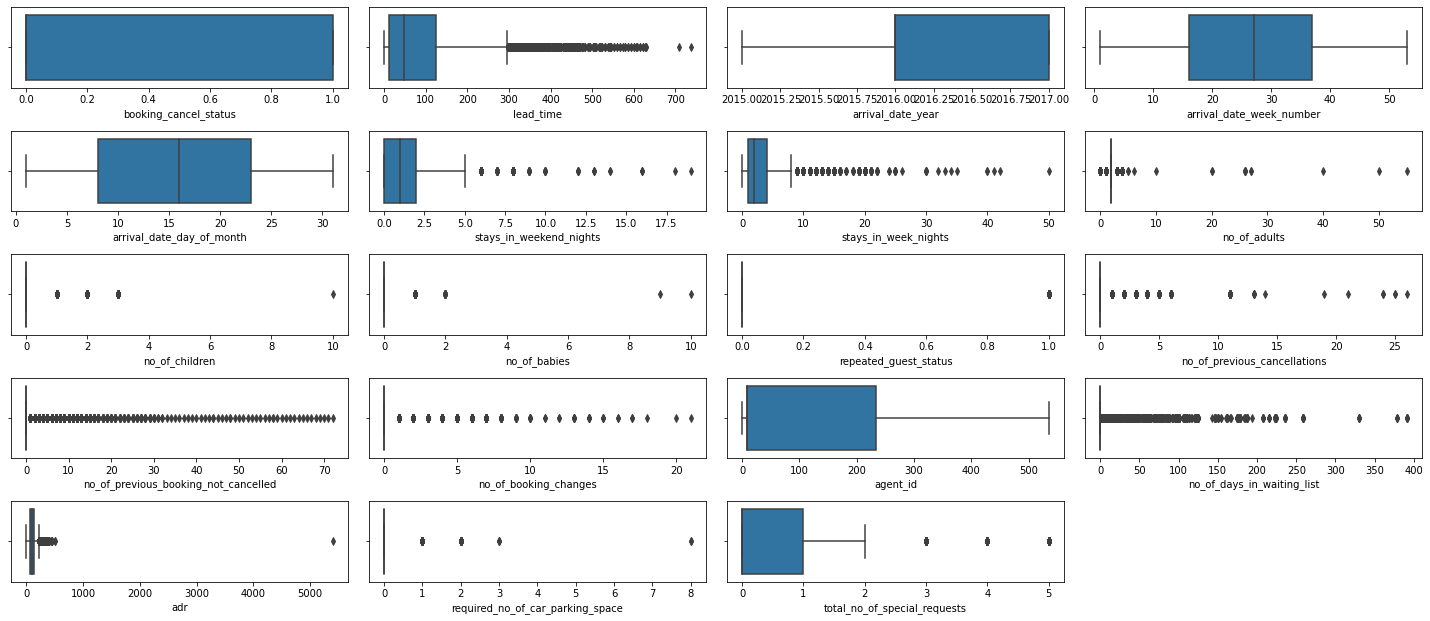

In [831]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
plt.figure(figsize = (20, 10))
num_it = 1 

for col in hdf.describe().columns:
    plt.subplot(6,4,num_it)
    sns.boxplot(hdf[col])
    num_it+=1
    
plt.tight_layout()

adr has some outliers so we should look and deal with it.

In [832]:
hdf[hdf['adr']<0] #only 1 negative row in adr so we will drop it


,hotel,booking_cancel_status,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,no_of_adults,...,no_of_booking_changes,deposit_type,agent_id,no_of_days_in_waiting_list,customer_type,adr,required_no_of_car_parking_space,total_no_of_special_requests,reservation_status,reservation_status_date
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,...,2,No Deposit,273,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15


In [833]:
hdf.drop(hdf.index[hdf['adr']<0],inplace=True)

In [834]:
hdf[hdf['adr']>1000] # only 1 row where adr is greater than 1000 which is adr=5400 so we will drop this row

,hotel,booking_cancel_status,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,no_of_adults,...,no_of_booking_changes,deposit_type,agent_id,no_of_days_in_waiting_list,customer_type,adr,required_no_of_car_parking_space,total_no_of_special_requests,reservation_status,reservation_status_date
48515,City Hotel,1,35,2016,March,13,25,0,1,2,...,1,Non Refund,12,0,Transient,5400.0,0,0,Canceled,2016-02-19


In [835]:
hdf.drop(hdf.index[hdf['adr']>5000],inplace=True)

#5. merge columns (e.g. [booking_day, booking_month, booking_year], [no_of_adults, no_of_children, no_of_babies] and [stays_in_weekend_nights,  stays_in_week_nights])   

In [836]:
# first converting year, month and date into string then we will join them because we can't join data in int or float format
hdf['arrival_month_year']=hdf[['arrival_date_month','arrival_date_year']].astype('str').apply(lambda x: '-'.join(x),axis=1)

In [837]:
# now converting booking_date column from str to datetime type.
hdf['arrival_month_year']=hdf['arrival_month_year'].apply(lambda x : datetime.strptime(x,'%B-%Y'))

In [838]:
# finding out, how many people are there in a group and storing in total_no_of_group 
hdf['total_no_in_group']=hdf['no_of_adults'] + hdf['no_of_children'] +hdf['no_of_babies']

In [839]:
hdf['total_no_of_stays']=hdf['stays_in_week_nights'] + hdf['stays_in_weekend_nights']

In [840]:
hdf.iloc[:20,7:] #looking data for confirmation

,stays_in_weekend_nights,stays_in_week_nights,no_of_adults,no_of_children,no_of_babies,meal_type,country,distribution_channel,repeated_guest_status,no_of_previous_cancellations,...,no_of_days_in_waiting_list,customer_type,adr,required_no_of_car_parking_space,total_no_of_special_requests,reservation_status,reservation_status_date,arrival_month_year,total_no_in_group,total_no_of_stays
0,0,0,2,0,0,BB,PRT,Direct,0,0,...,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01,2,0
1,0,0,2,0,0,BB,PRT,Direct,0,0,...,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01,2,0
2,0,1,1,0,0,BB,GBR,Direct,0,0,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,1,1
3,0,1,1,0,0,BB,GBR,Corporate,0,0,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,1,1
4,0,2,2,0,0,BB,GBR,TA/TO,0,0,...,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01,2,2
6,0,2,2,0,0,BB,PRT,Direct,0,0,...,0,Transient,107.00,0,0,Check-Out,2015-07-03,2015-07-01,2,2
7,0,2,2,0,0,FB,PRT,Direct,0,0,...,0,Transient,103.00,0,1,Check-Out,2015-07-03,2015-07-01,2,2
8,0,3,2,0,0,BB,PRT,TA/TO,0,0,...,0,Transient,82.00,0,1,Canceled,2015-05-06,2015-07-01,2,3
9,0,3,2,0,0,HB,PRT,TA/TO,0,0,...,0,Transient,105.50,0,0,Canceled,2015-04-22,2015-07-01,2,3
10,0,4,2,0,0,BB,PRT,TA/TO,0,0,...,0,Transient,123.00,0,0,Canceled,2015-06-23,2015-07-01,2,4


#Exploratary Data Analysis
lets find the correlation between column then we will perform eda

In [841]:
hdf1=hdf.corr()

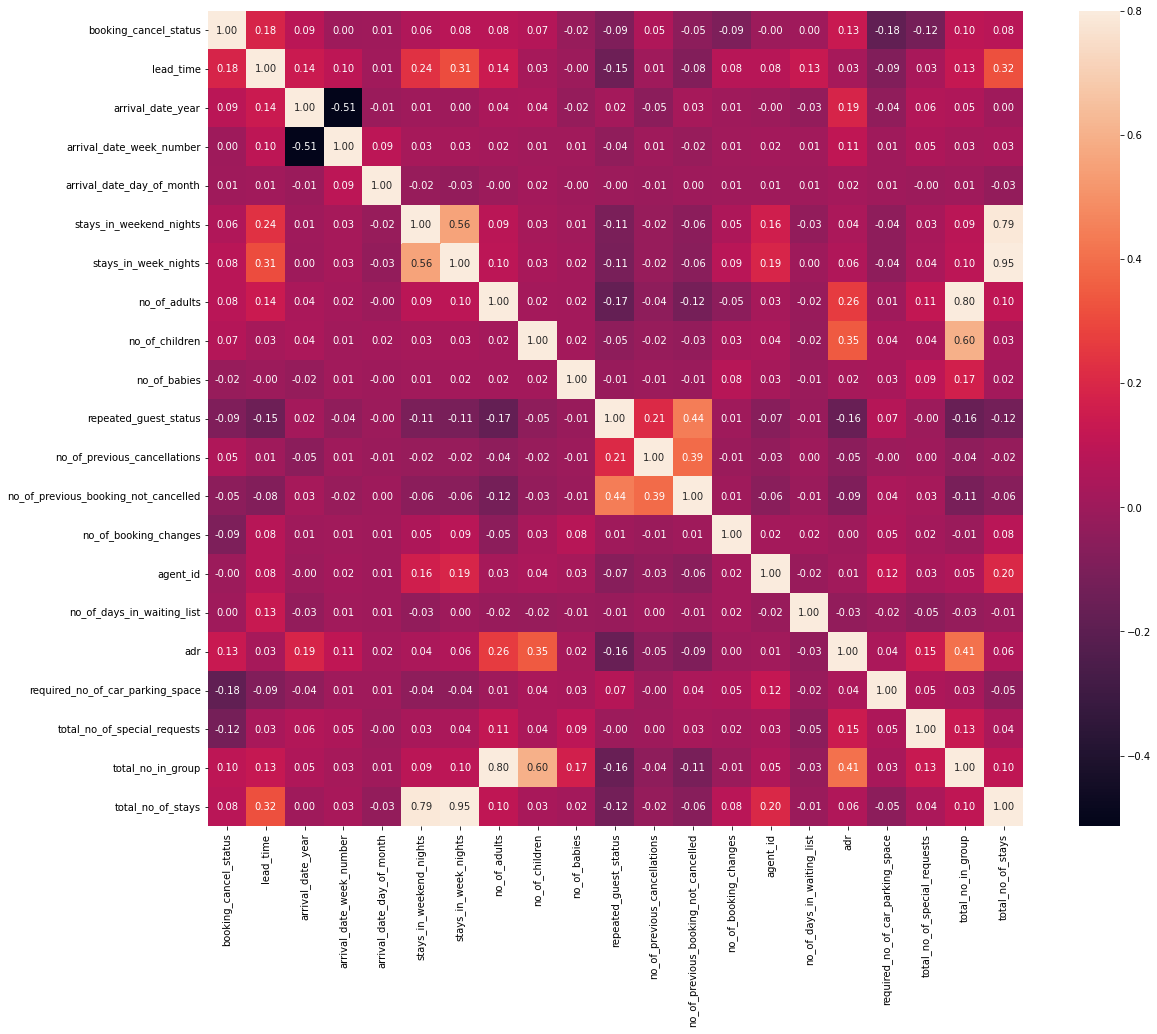

In [842]:
# ploting heat map finding correlation between columns
plt.subplots(figsize=(20, 15))
sns.heatmap(hdf1,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

# filtering columns which are require in data analysis

In [843]:
df=hdf[['hotel','booking_cancel_status','lead_time','no_of_days_in_waiting_list','reserved_room_type','assigned_room_type',
        'meal_type','arrival_date_year','arrival_date_month','arrival_month_year','country','distribution_channel',
        'required_no_of_car_parking_space','no_of_adults','no_of_children','repeated_guest_status','no_of_babies',
        'total_no_in_group','total_no_of_stays','total_no_of_special_requests','customer_type','deposit_type','adr']]

In [844]:
df.head()

,hotel,booking_cancel_status,lead_time,no_of_days_in_waiting_list,reserved_room_type,assigned_room_type,meal_type,arrival_date_year,arrival_date_month,arrival_month_year,...,no_of_adults,no_of_children,repeated_guest_status,no_of_babies,total_no_in_group,total_no_of_stays,total_no_of_special_requests,customer_type,deposit_type,adr
0,Resort Hotel,0,342,0,C,C,BB,2015,July,2015-07-01,...,2,0,0,0,2,0,0,Transient,No Deposit,0.0
1,Resort Hotel,0,737,0,C,C,BB,2015,July,2015-07-01,...,2,0,0,0,2,0,0,Transient,No Deposit,0.0
2,Resort Hotel,0,7,0,A,C,BB,2015,July,2015-07-01,...,1,0,0,0,1,1,0,Transient,No Deposit,75.0
3,Resort Hotel,0,13,0,A,A,BB,2015,July,2015-07-01,...,1,0,0,0,1,1,0,Transient,No Deposit,75.0
4,Resort Hotel,0,14,0,A,A,BB,2015,July,2015-07-01,...,2,0,0,0,2,2,1,Transient,No Deposit,98.0


#Analysis on the Basis of columns
1. Analysis on the basis of hotel
2. Analysis on the basis of booking and cancellation
3. Analysis on the basis of distribution channel
4. Analysis on the basis of deposit type
5. Analysis on the basis of meal type
6. Analysis on the basis of room type
7. Analysis on the basis of country


#1. Analysis on the basis of Hotel

1.   What is the percentage of booking in each hotel?*
2.   which hotel has a higher booking cancellation rate?
3.   What is average stay in a hotel prefered by groups?=
4.   How long do people prefer to stay in both hotels?=
5.   Which hotel require more car parking spaces?
6.   Which hotel generates the most revenue and why?
7.   Which hotel type prefered the most?*
8.   Which are the busiest months for hotel?
9.   What is the chances of cutomer retention for hotels?
10.  Which hotel has the higher lead time?



Q1. What is the percentage of bookings in each hotel?

In [845]:
hotel_vc=pd.DataFrame(df['hotel'].value_counts())
hotel_vc.index=['city_hotel','resort_hotel']
hotel_vc.columns=['count']
hotel_vc['percentage'] = (hotel_vc['count'])*100/(hotel_vc['count'].sum())
hotel_vc


,count,percentage
city_hotel,53427,61.133487
resort_hotel,33967,38.866513


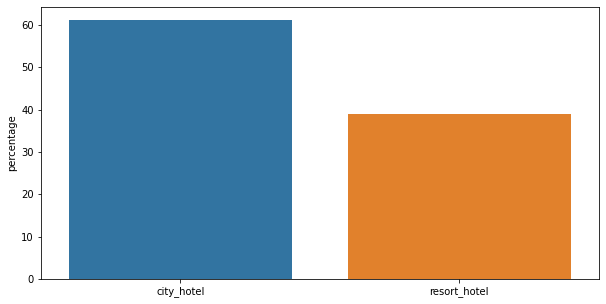

In [846]:
#ploting bar graph for finding popularity percentage for both hotels 
plt.figure(figsize = (10,5))
sns.barplot(x=['city_hotel','resort_hotel'],y=hotel_vc['percentage'])

Ans1. Around 60% people booked City Hotel and 40% people booked Resort Hotel. on the basis of percentage we can assume that city hotel is more popular than Resort Hotel.

Q3&4. How long do people prefer to stay in both hotels?

Text(0, 0.5, 'count')

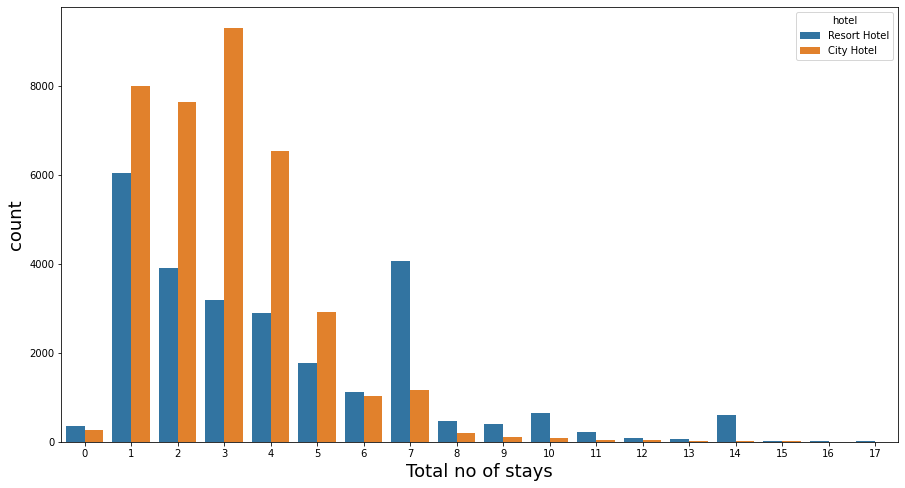

In [847]:
# count plot
not_cancel=df[df['booking_cancel_status']==0]
not_cancel=not_cancel[not_cancel['total_no_of_stays'] < 18]
plt.figure(figsize = (15,8))
sns.countplot(x=not_cancel['total_no_of_stays'],hue=not_cancel['hotel'])
plt.xlabel('Total no of stays',fontsize=18)
plt.ylabel('count',fontsize=18)



Ans3&4. On the basis of above chart, if people not cancelled their booking they prefer City Hotel for short stay which is less than and equal to 5 days and Resort Hotel for long stay which is less than or equal to 14 days.

Q8. Which are the busiest months for hotel?

Text(0.5, 1.0, 'Most busiest month chart')

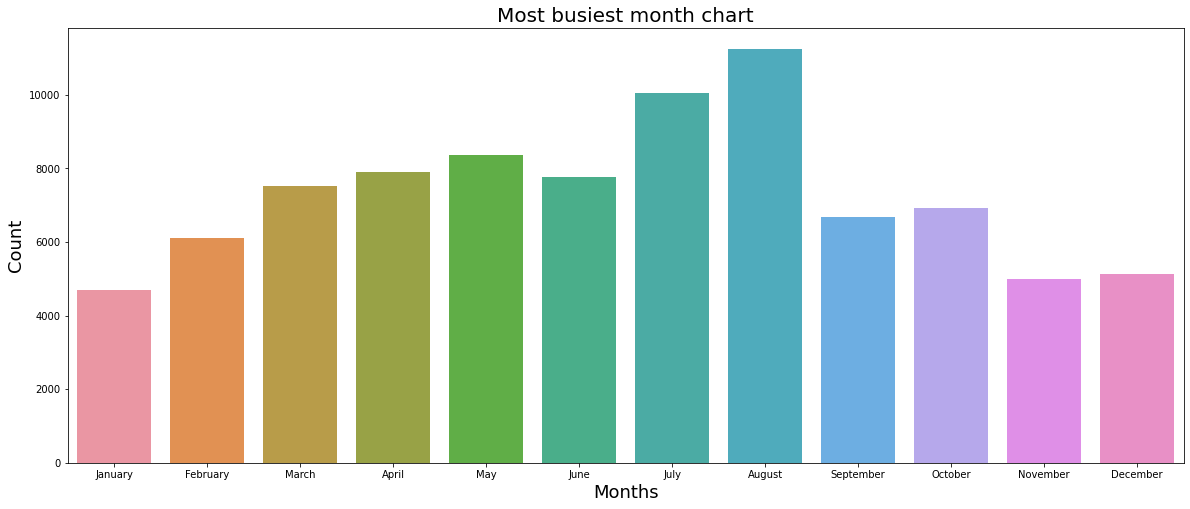

In [848]:
busiest_month=df['arrival_date_month'].value_counts().sort_values(ascending=False)
busy_month=pd.DataFrame(busiest_month).reset_index()
busy_month.columns=['month','count']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
busy_month['month'] = pd.Categorical(busy_month['month'], categories = months, ordered=True)
busy_month.sort_values(by='month').reset_index(drop=True)
plt.figure(figsize=(20,8))
sns.barplot(x=busy_month['month'],y=busy_month['count'])
plt.xlabel('Months',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.title('Most busiest month chart',fontsize=20)

Ans8. According to chart, Most busiest months for hotels is August

Q9. What is the chances of cutomer retention for hotels?

Q10. Which hotel has the higher lead time?

Text(0.5, 1.0, 'Average lead time for hotels')

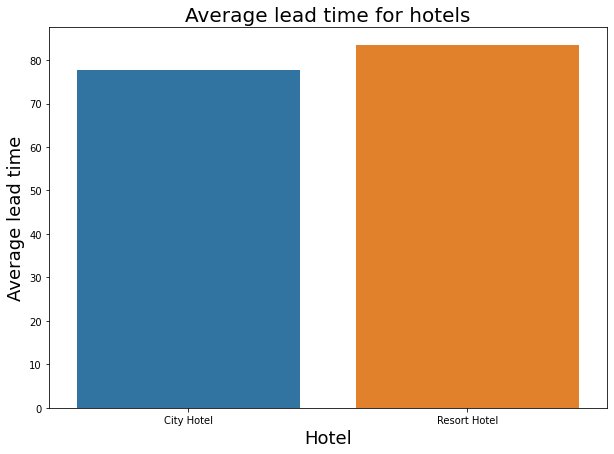

In [849]:
avg_lead=df.groupby(by='hotel').agg({'lead_time':'mean'}).reset_index()
avg_lead
plt.figure(figsize=(10,7))
sns.barplot(x=avg_lead['hotel'],y=avg_lead['lead_time'])
plt.xlabel('Hotel',fontsize=18)
plt.ylabel('Average lead time',fontsize=18)
plt.title('Average lead time for hotels',fontsize=20)

In [850]:
repeat_df=df[df['repeated_guest_status']==1]


#2.Analysis on the basis of booking and cancellation


1.   Does a longer waiting period or a longer lead time cause bookings to be cancelled?
2.   Visualization monthly bookings and monthly cancellations.
3.   Relationship between lead time and cancellation.
4.   Which type of customers make the most bookings?
5.   Which type of customers make the special requests? 
6.   Most bookings come from which type, either couples or families.



Q4. Which type of customers make the most bookings?

Text(0, 0.5, 'Count')

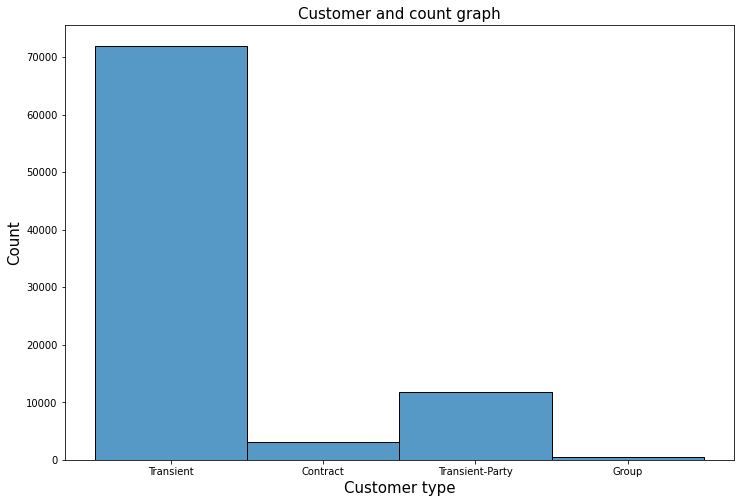

In [851]:
plt.figure(figsize=(12,8))
sns.histplot(df['customer_type'])
plt.title('Customer and count graph',fontsize=15)
plt.xlabel('Customer type',fontsize=15)
plt.ylabel('Count',fontsize=15)

Ans4. According to histogram chart Transient(when the booking is not part of a group or contract, and is not associated to other transient booking) customers make most bookings.

Q5. Which type of customers make the special requests?

<Figure size 864x864 with 0 Axes>

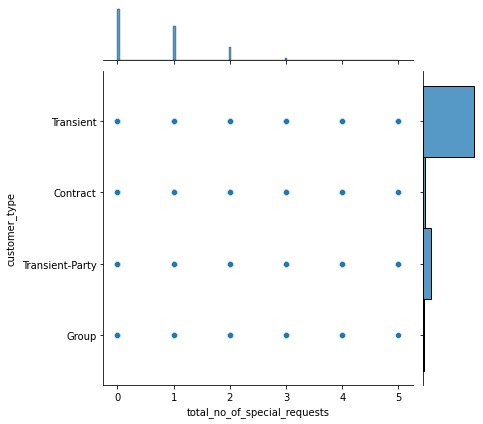

In [852]:
plt.figure(figsize=(12,12))
sns.jointplot(x=df['total_no_of_special_requests'],y=df['customer_type'])

Ans5. According to joint chart, Most no of special requests comes from Transient customers.

#3. Analysis on the basis of distribution channel


1.   Which distribution channel is mostly used?
2.   Which distribution channel has a longer average waiting time?
3.   Which distribution channel  has the highest cancellation percentage?
4.   Which distribution channel generates the most revenue for hotels?




Q1.   Which distribution channel is mostly used?

In [853]:
df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

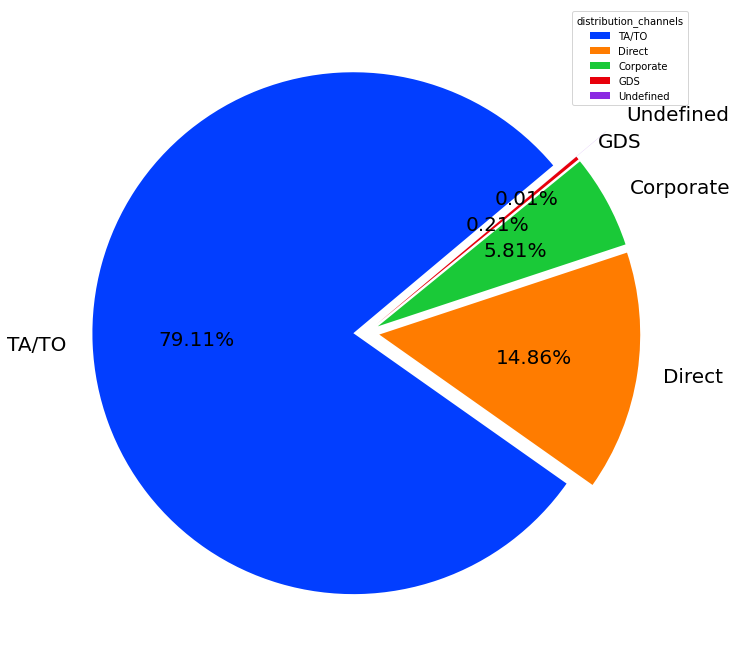

In [854]:
dist_vc=pd.DataFrame(df['distribution_channel'].value_counts()).reset_index()
dist_vc['percentage']=(dist_vc['distribution_channel'])*100/dist_vc['distribution_channel'].sum()
dist_vc.columns=['distribution_channel','count','percentage']
plt.figure(figsize= (15,12))
plt.tight_layout()
sort_legend=False
palette_color=sns.color_palette('bright')
plt.pie(dist_vc['percentage'],labels=dist_vc['distribution_channel'],explode=[0.05,0.05,0.05,0.05,0.2],
        startangle=40,colors=palette_color,textprops={'fontsize':20}, autopct='%0.2f%%')
plt.legend(title='distribution_channels')
plt.show()



Ans1. According above pie chart 79.11% bookings are made by TA/TO(Travel agent/Travel operators), so we can say that TA/TO distribution channel is mostly use by groups.

Q2.Which distribution channel has a longer average waiting time?

In [855]:
df.describe()

,booking_cancel_status,lead_time,no_of_days_in_waiting_list,arrival_date_year,required_no_of_car_parking_space,no_of_adults,no_of_children,repeated_guest_status,no_of_babies,total_no_in_group,total_no_of_stays,total_no_of_special_requests,adr
count,87394.000000,87394.000000,87394.000000,87394.000000,87394.000000,87394.000000,87394.000000,87394.000000,87394.000000,87394.000000,87394.000000,87394.000000,87394.000000
mean,0.274893,79.890565,0.749582,2016.210289,0.084228,1.875792,0.138637,0.039064,0.010825,2.025253,3.630615,0.698583,106.277964
std,0.446463,86.052295,10.015845,0.686104,0.281536,0.626507,0.455876,0.193749,0.113598,0.794328,2.763382,0.831949,52.017324
min,0.000000,0.000000,0.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,11.000000,0.000000,2016.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,72.000000
50%,0.000000,49.000000,0.000000,2016.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,98.100000
75%,1.000000,125.000000,0.000000,2017.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,5.000000,1.000000,134.000000
max,1.000000,737.000000,391.000000,2017.000000,8.000000,55.000000,10.000000,1.000000,10.000000,55.000000,69.000000,5.000000,510.000000


In [856]:
df[df['no_of_days_in_waiting_list']!=0].describe() # As we can say that only 860 rows out of 87934 have (no_of_days_in_waiting_list > 0)

,booking_cancel_status,lead_time,no_of_days_in_waiting_list,arrival_date_year,required_no_of_car_parking_space,no_of_adults,no_of_children,repeated_guest_status,no_of_babies,total_no_in_group,total_no_of_stays,total_no_of_special_requests,adr
count,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000
mean,0.341860,176.248837,76.173256,2016.019767,0.023256,1.704651,0.011628,0.011628,0.003488,1.719767,3.203488,0.160465,85.010291
std,0.474609,101.478286,66.739177,0.667440,0.296536,0.525243,0.117620,0.107266,0.058994,0.553814,2.000404,0.428680,36.527072
min,0.000000,1.000000,1.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,88.000000,33.000000,2016.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,65.337500
50%,0.000000,161.000000,59.000000,2016.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,80.000000
75%,1.000000,266.500000,99.000000,2016.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,100.000000
max,1.000000,464.000000,391.000000,2017.000000,8.000000,3.000000,2.000000,1.000000,1.000000,4.000000,25.000000,4.000000,367.000000


,distribution_channel,no_of_days_in_waiting_list
0,Corporate,28.371429
1,Direct,78.409836
2,TA/TO,78.184555


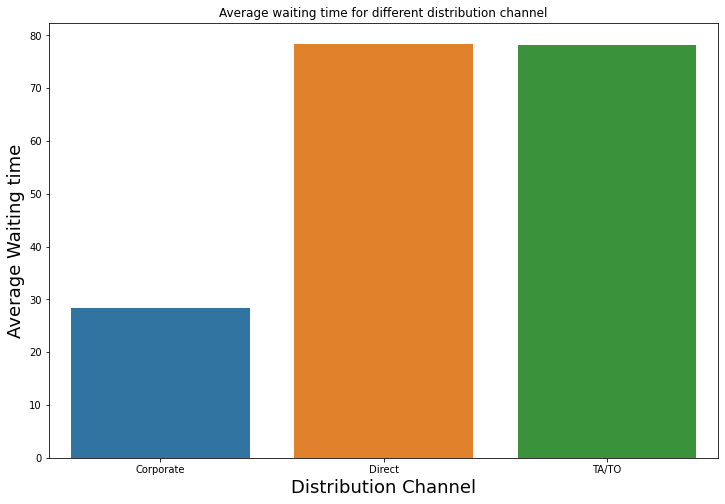

In [857]:
avg_wait_dist=df[df['no_of_days_in_waiting_list']!=0].groupby(['distribution_channel']).agg({'no_of_days_in_waiting_list':'mean'}).reset_index()
plt.figure(figsize=(12,8))
sns.barplot(x=avg_wait_dist['distribution_channel'],y=avg_wait_dist['no_of_days_in_waiting_list'])
plt.xlabel('Distribution Channel',fontsize=18)
plt.ylabel('Average Waiting time',fontsize=18)
plt.title('Average waiting time for different distribution channel')
avg_wait_dist

Ans2. According the dataset and above chart, there are 87934 column in which 860 columns having waiting time >0 days, so we can say that most of the time there is no waiting time but if there is any waiting time Direct and TA/T0 has the same average waiting time which is around 78 days.

Q3.Which distribution channel  has the highest cancellation?


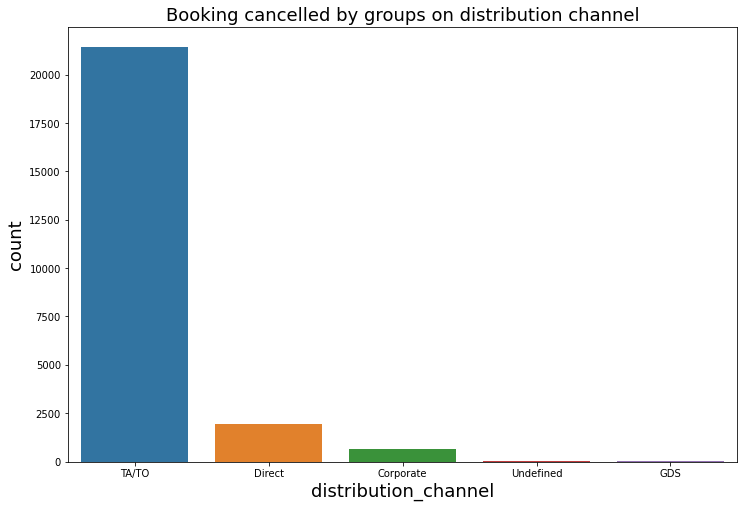

In [858]:
dist_cancel=df[df['booking_cancel_status']==1]
plt.figure(figsize=(12,8))
plt.xlabel('Distribution_channel',fontsize=18)
plt.ylabel('count',fontsize=18)
plt.title('Booking cancelled by groups on distribution channel',fontsize=18)
sns.countplot(dist_cancel['distribution_channel'])


Ans3. According to count chart most number booking cancel from TA/TO



#4. Analysis on the basis of deposit type


1.   analyzing which deposit type is preferred most?



No Deposit    86250
Non Refund     1037
Refundable      107
Name: deposit_type, dtype: int64

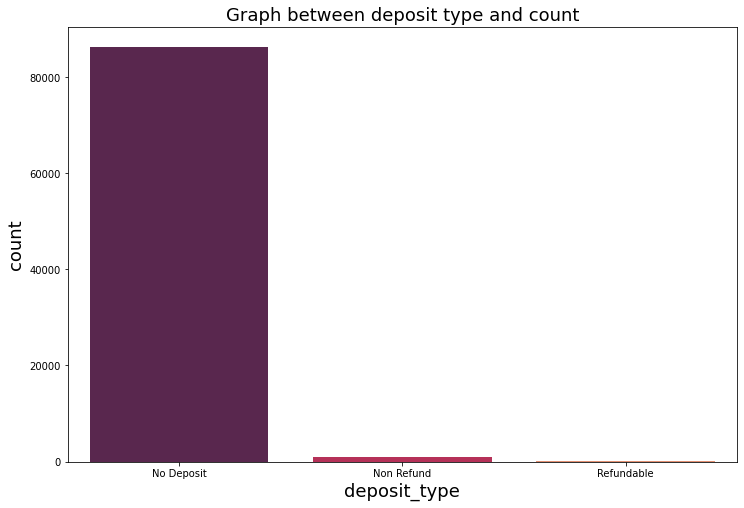

In [891]:
dep_df=pd.DataFrame(df['deposit_type'].value_counts()).reset_index()
dep_df.columns=['deposit_type','count']
plt.figure(figsize=(12,8))
plt.xlabel('Deposit Type',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.title('Graph between deposit type and count',fontsize=18)
sns.barplot(x=dep_df['deposit_type'],y=dep_df['count'],palette='rocket',units=True)

Ans1. most prefered deposit type is **No Deposit** in which there is no need of prepayment for booking.

#5. Analysis on the basis of meal type


1.   Which type of meal is most and least prefered by the customers?

#6. Analysis on the basis of room type


1.   which room type is in most demand and which room type generates the highest average daily rate?



In [860]:
df['reserved_room_type'].value_counts()

A    56550
D    17398
E     6049
F     2823
G     2052
B      999
C      915
H      596
L        6
P        6
Name: reserved_room_type, dtype: int64

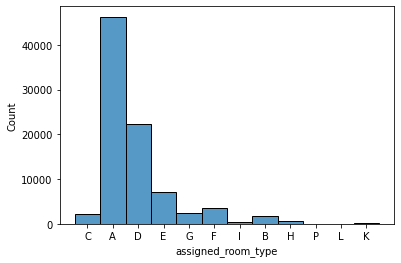

In [861]:
sns.histplot(df['assigned_room_type'])

Text(0.5, 1.0, 'Bar graph for Room Type and average adr ')

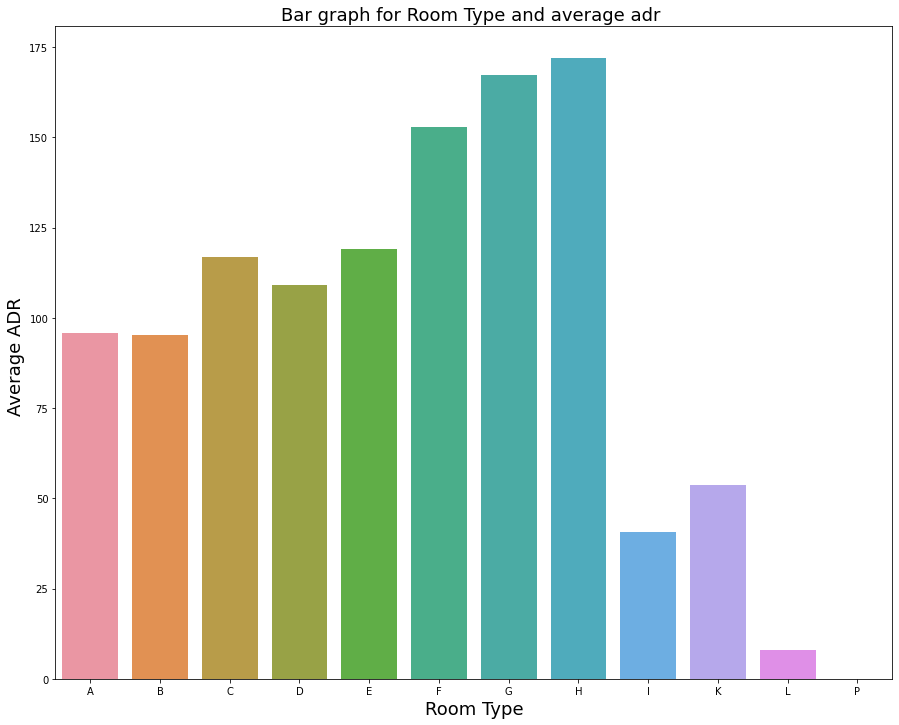

In [862]:
room_adr=df.groupby('assigned_room_type').agg({'adr':'mean'}).reset_index()
plt.figure(figsize=(15,12))
sns.barplot(x=room_adr['assigned_room_type'].sort_values(ascending=True),y=room_adr['adr'])
plt.xlabel('Room Type',fontsize=18)
plt.ylabel('Average ADR ',fontsize=18)
plt.title('Bar graph for Room Type and average adr ',fontsize=18)

Ans1. According to above histogram chart most demanding room is A (Room with discount available) type but according to above bar chart H(Complimentary use of health facilities) room type is generates greatest ADR. 

#7. Analysis on the basis of country


1.   Which country has the greatest number of guests?



In [863]:
country_guest =df[['country','total_no_in_group']]
country_guest=country_guest.groupby(by='country').agg({'total_no_in_group':'sum'}).reset_index()

In [864]:
basemap = folium.Map()
country_guest_map = px.choropleth(df, locations = country_guest['country'],color = country_guest['total_no_in_group'], hover_name = country_guest['country'],
                                  width=1396,height=800)
country_guest_map.show()

Text(0.5, 1.0, 'Relation between country wise and Total no of guests')

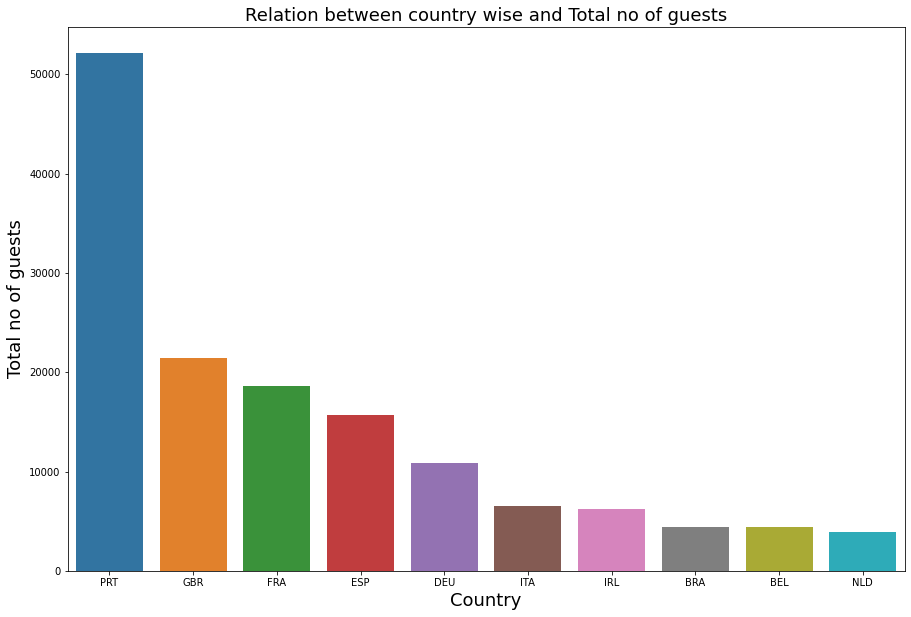

In [865]:
country_guest1=country_guest.sort_values(by='total_no_in_group',ascending=False).head(10)
country_guest1
plt.figure(figsize=(15,10))
sns.barplot(x=country_guest1['country'],y=country_guest1['total_no_in_group'])
plt.xlabel('Country',fontsize=18)
plt.ylabel('Total no of guests',fontsize=18)
plt.title('Relation between country wise and Total no of guests',fontsize=18)

Ans1. On the basis on map and chart we can say that most guests come from **Southern Europe** and **Portugal** has the greatest number of guests.